In [ ]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import random
from scipy.ndimage import uniform_filter
from skimage.color import rgb2gray
from skimage.filters import sobel
from scipy.ndimage import median_filter
import os

#Bai 1
img = Image.open('bird.png')
r, g, b = img.split()

Image.merge("RGB", (r, Image.new("L", r.size), Image.new("L", r.size))).save("red.png")
Image.merge("RGB", (Image.new("L", g.size), g, Image.new("L", g.size))).save("green.png")
Image.merge("RGB", (Image.new("L", b.size), Image.new("L", b.size), b)).save("blue.png")

plt.show()

<Figure size 640x480 with 0 Axes>

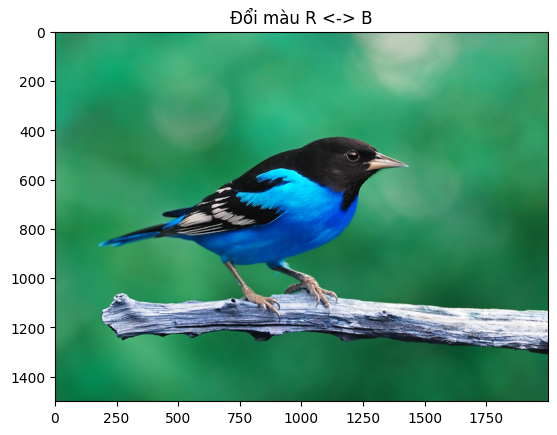

In [ ]:
#Bai 2
r, g, b = img.split()
swapped = Image.merge("RGB", (b, g, r))
swapped.save("swapped.png")
plt.imshow(swapped)
plt.title("Đổi màu R <-> B")
plt.axis("on")
plt.show()


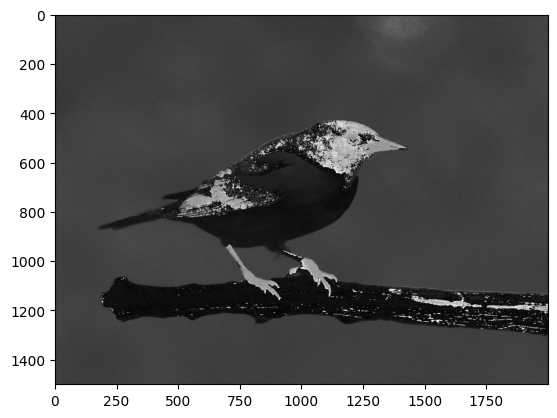

In [ ]:
#Bai 3
arr = np.array(img).astype("float32") / 255
hsv = np.zeros_like(arr)
hsv[..., 1] = 255
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        hsv[i, j] = colorsys.rgb_to_hsv(*arr[i, j])
h = (hsv[:, :, 0] * 255).astype('uint8')
s = (hsv[:, :, 1] * 255).astype('uint8')
v = (hsv[:, :, 2] * 255).astype('uint8')
plt.imshow(h, cmap='gray')
plt.axis("on")
plt.show()


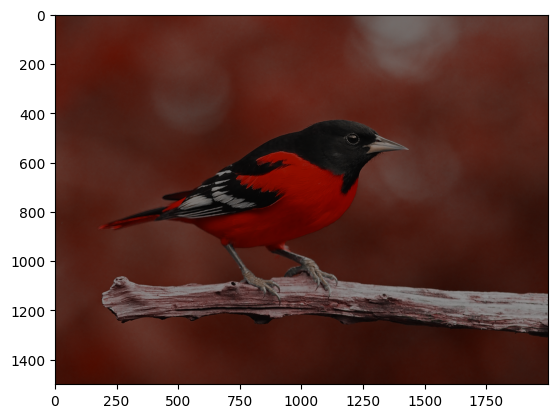

In [ ]:
#Bai 4
hsv[:, :, 0] /= 3
hsv[:, :, 2] *= 0.75

rgb = np.zeros_like(hsv)
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        rgb[i, j] = colorsys.hsv_to_rgb(*hsv[i, j])

rgb_img = Image.fromarray((rgb * 255).astype('uint8'))
rgb_img.save("hsv_doimau.png")

plt.imshow(rgb_img)
plt.axis("on")
plt.show()


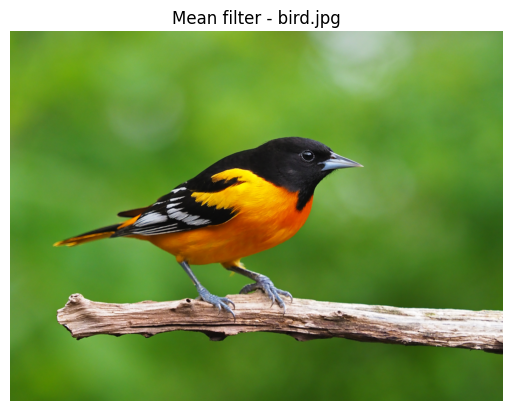

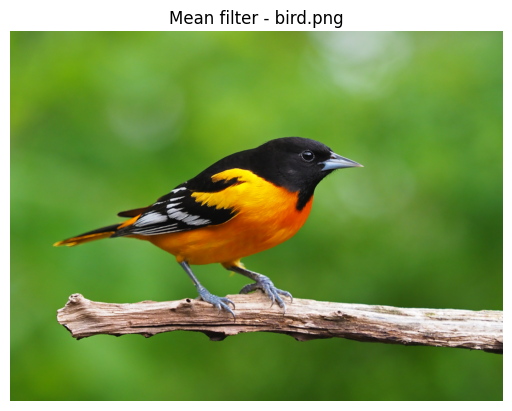

In [ ]:
#Bai 5
folder = "Exercise"
output_folder = "Exercise_MeanFiltered"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        path = os.path.join(folder, filename)
        img = Image.open(path)
        arr = np.array(img)

        blur = uniform_filter(arr, size=(3, 3, 1))
        blur_img = Image.fromarray(blur.astype("uint8"))
        out_path = os.path.join(output_folder, f"mean_{filename}")
        blur_img.save(out_path)

        plt.imshow(blur_img)
        plt.title(f"Mean filter - {filename}")
        plt.axis("off")
        plt.show()


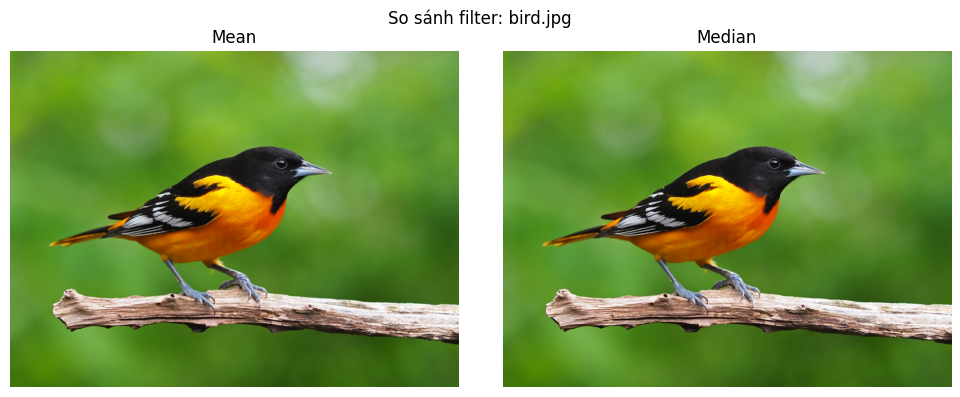

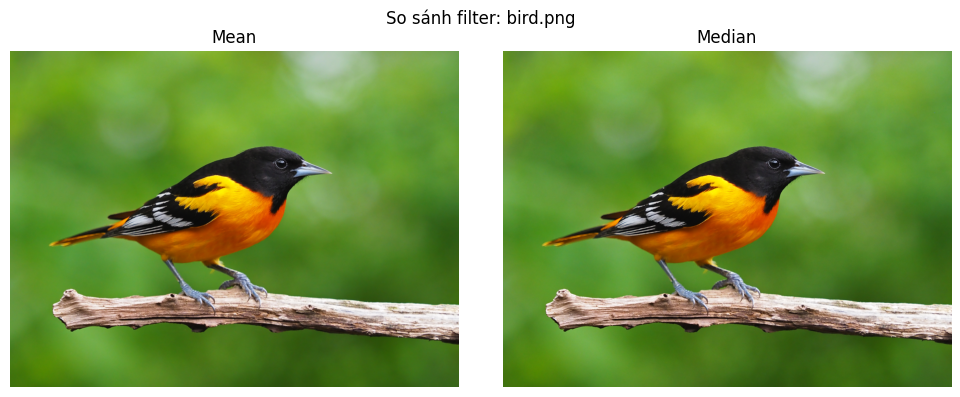

In [ ]:
#Bai 6

folder = "Exercise"
output_folder = "Exercise_FilterCompare"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        path = os.path.join(folder, filename)
        img = Image.open(path)
        arr = np.array(img)

        mean_img = uniform_filter(arr, size=(3, 3, 1))
        mean_img = Image.fromarray(mean_img.astype("uint8"))
        mean_img.save(os.path.join(output_folder, f"mean_{filename}"))

        median_img = median_filter(arr, size=(3, 3, 1))
        median_img = Image.fromarray(median_img.astype("uint8"))
        median_img.save(os.path.join(output_folder, f"median_{filename}"))

        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(mean_img)
        plt.title("Mean")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(median_img)
        plt.title("Median")
        plt.axis("off")

        plt.suptitle(f"So sánh filter: {filename}")
        plt.tight_layout()
        plt.show()

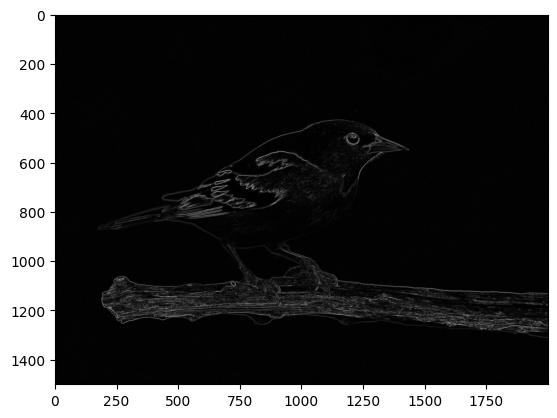

In [ ]:
#Bai 7
gray = rgb2gray(np.array(img))
edges = sobel(gray)

plt.imshow(edges, cmap='gray')
plt.axis("on")
plt.show()

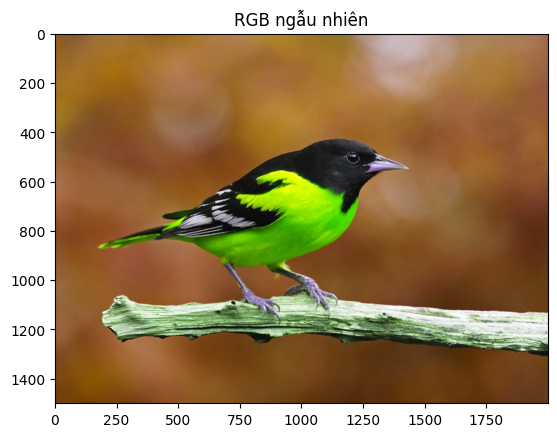

In [ ]:
#Bai 8
arr = np.array(blur_img)
ch = [0, 1, 2]
random.shuffle(ch)
new_arr = arr[:, :, ch]

Image.fromarray(new_arr).save("rgb_random.png")
plt.imshow(new_arr)
plt.axis("on")
plt.show()

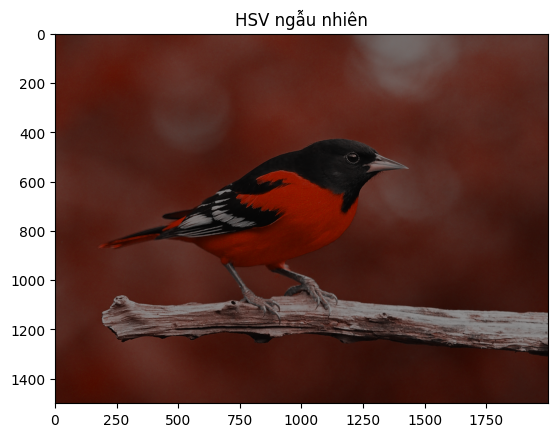

In [52]:
#Bai 9
h_flat = hsv[:, :, 0].flatten()
np.random.shuffle(h_flat)
hsv[:, :, 0] = h_flat.reshape(hsv[:, :, 0].shape)

for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        rgb[i, j] = colorsys.hsv_to_rgb(*hsv[i, j])

rgb_rand = Image.fromarray((rgb * 255).astype("uint8"))
rgb_rand.save("random_hue.png")

plt.imshow(rgb_rand)
plt.title("HSV ngẫu nhiên")
plt.axis("on")
plt.show()